<a href="https://colab.research.google.com/github/Ismael-Vasco/Regressions/blob/main/Regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOGISTIC REGRESSION

## LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Metricas
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## IMPORTACIÓN DE LOS DATOS

In [2]:
# datos importados de github
data = pd.read_csv('https://raw.githubusercontent.com/AnshTanwar/Global-Data-on-Sustainable-Energy/refs/heads/main/global-data-on-sustainable-energy%20(1).csv')
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


## EXPLORATORY DATA ANALYSIS

In [3]:
# INFORMACIÓN DE LOS DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

## BOXPLOT PARA VER EL COMPORTAMIENTO DE LOS DATOS

<Axes: >

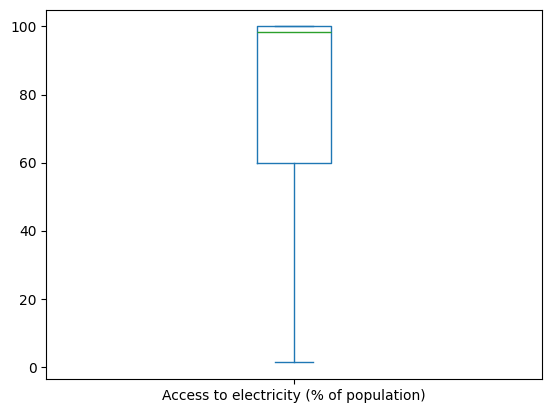

In [4]:
data['Access to electricity (% of population)'].plot(kind='box')

<Axes: >

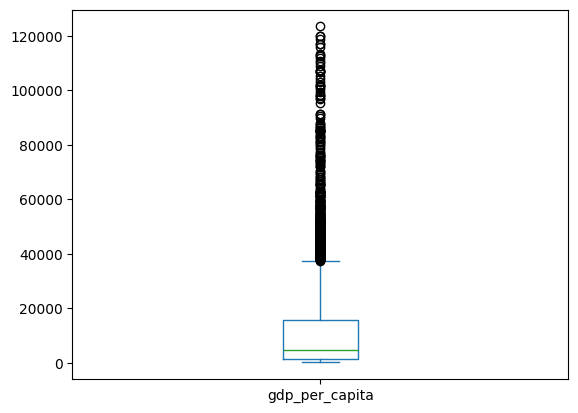

In [5]:
data['gdp_per_capita'].plot(kind='box')

<Axes: >

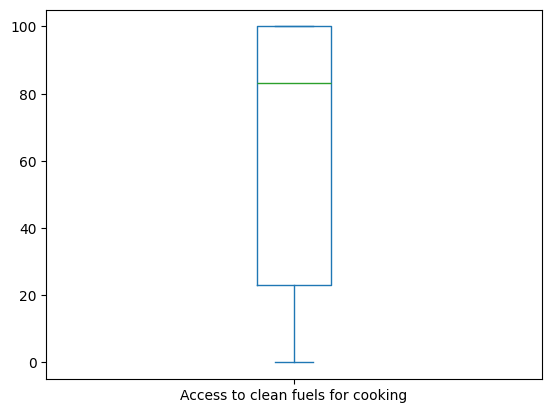

In [6]:
data['Access to clean fuels for cooking'].plot(kind='box')

<Axes: >

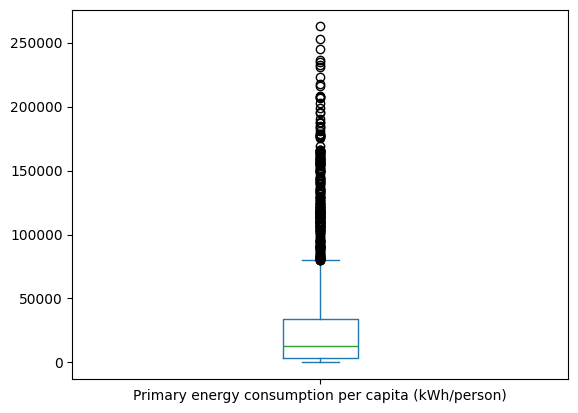

In [7]:
data['Primary energy consumption per capita (kWh/person)'].plot(kind='box')

<Axes: >

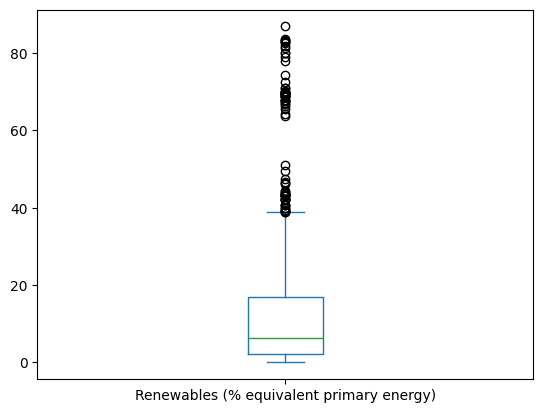

In [8]:
data['Renewables (% equivalent primary energy)'].plot(kind='box')

DEBIDO A LOS OUTLIERS SE IMPUTA POR LA MEDIANA

<Axes: >

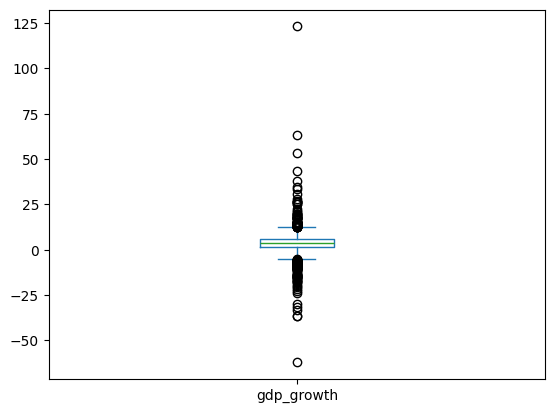

In [9]:
data['gdp_growth'].plot(kind='box')

<Axes: >

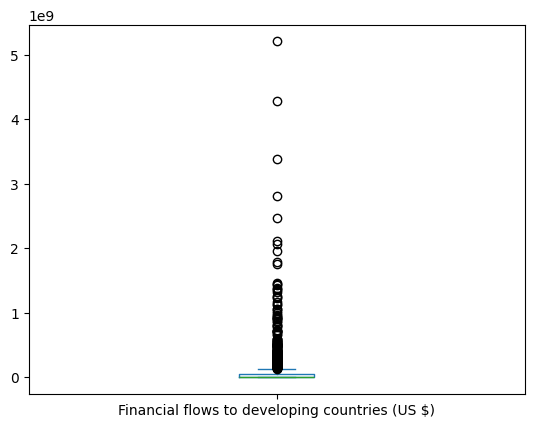

In [10]:
data['Financial flows to developing countries (US $)'].plot(kind='box')

<Axes: >

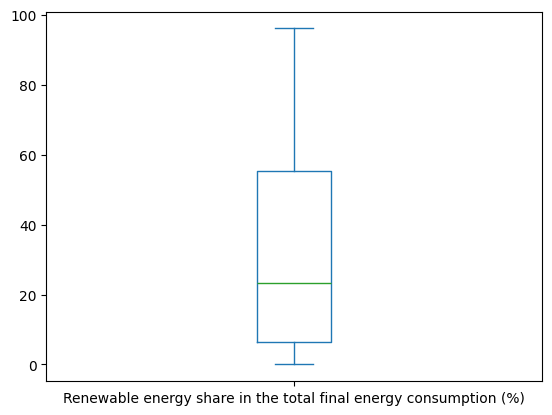

In [11]:
data['Renewable energy share in the total final energy consumption (%)'].plot(kind='box')

<Axes: >

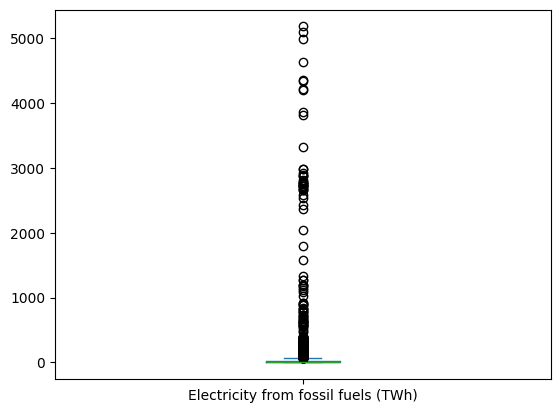

In [12]:
data['Electricity from fossil fuels (TWh)'].plot(kind='box')

<Axes: >

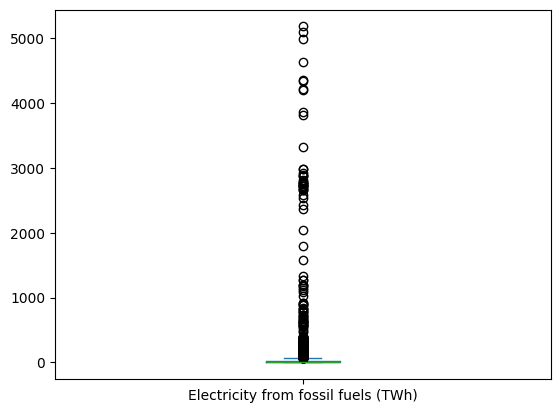

In [13]:
data['Electricity from fossil fuels (TWh)'].plot(kind='box')

<Axes: >

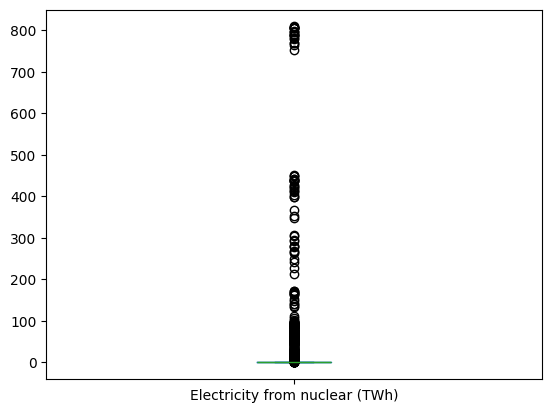

In [14]:
data['Electricity from nuclear (TWh)'].plot(kind='box')

<Axes: >

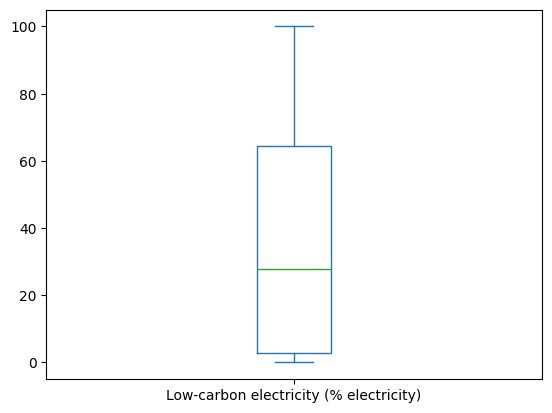

In [15]:
data['Low-carbon electricity (% electricity)'].plot(kind='box')

## IMPUTACIÓN DE DATOS

In [16]:
# IMPUTACIÓN DE DATOS POR LA MEDIANA
data['Access to electricity (% of population)'].fillna(data['Access to electricity (% of population)'].median(),inplace=True)

data['gdp_per_capita'].fillna(data['gdp_per_capita'].median(),inplace=True)

data['Access to clean fuels for cooking'].fillna(data['Access to clean fuels for cooking'].median(),inplace=True)

data['Primary energy consumption per capita (kWh/person)'].fillna(data['Primary energy consumption per capita (kWh/person)'].median(),inplace=True)

data['Renewables (% equivalent primary energy)'].fillna(data['Renewables (% equivalent primary energy)'].median(),inplace=True)

# imputar los NaN de Renewable-electricity-generating-capacity-per-capita
data['Renewable-electricity-generating-capacity-per-capita'].fillna(data['Renewable-electricity-generating-capacity-per-capita'].median(),inplace=True)

# IMPUTAR gdp_growth
data['gdp_growth'].fillna(data['gdp_growth'].median(),inplace=True)

# IMPUTANDO Financial flows to developing countries (US $)
data['Financial flows to developing countries (US $)'].fillna(data['Financial flows to developing countries (US $)'].median(),inplace=True)

# IMPUTANDO Renewable energy share in the total final energy consumption (%)
data['Renewable energy share in the total final energy consumption (%)'].fillna(data['Renewable energy share in the total final energy consumption (%)'].median(),inplace=True)

# IMPUTANDO Low-carbon electricity (% electricity)
data['Low-carbon electricity (% electricity)'].fillna(data['Low-carbon electricity (% electricity)'].median(),inplace=True)

<ipython-input-16-a224d660cef7>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Renewable-electricity-generating-capacity-per-capita'].fillna(data['Renewable-electricity-generating-capacity-per-capita'].median(),inplace=True)


In [17]:
data.isnull().sum()

,0
Entity,0
Year,0
Access to electricity (% of population),0
Access to clean fuels for cooking,0
Renewable-electricity-generating-capacity-per-capita,0
Financial flows to developing countries (US $),0
Renewable energy share in the total final energy consumption (%),0
Electricity from fossil fuels (TWh),21
Electricity from nuclear (TWh),126
Electricity from renewables (TWh),21


In [18]:
# crar variable nueva binaria
data['Acceso > 50%'] = data['Access to electricity (% of population)'].apply(lambda x: 1 if x > 50 else 0)

## MODELO DE REGRESIÓN LINEAL

In [20]:
# feature
X = data[['Renewable-electricity-generating-capacity-per-capita', 'Access to clean fuels for cooking']]
# target - label
y = data['Acceso > 50%']

#dividir registros en segmentos de entrenamisnto y prueba
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X,y,test_size=0.2, random_state=42)

In [27]:
# entrenamiento del modelo
modelo = LogisticRegression()
modelo.fit(x_entrenamiento, y_entrenamiento)

y_prediccion = modelo.predict(x_prueba)

In [28]:
# R2
# 0 esta descachado -> no le atina a nada
# 1 es que predice el 100%
accuracy = modelo.score(x_prueba, y_prueba)
print(f'accuracy: {accuracy}')

accuracy: 0.8986301369863013


In [30]:
#matris de condufisón
matrix_confusion = confusion_matrix(y_prueba, y_predicciones)
print("Matriz de confusión:")
print(matrix_confusion)

Matriz de confusión:
[[114  32]
 [ 42 542]]


In [32]:
# curva de ROC
#                                                porción
y_probabilidades = modelo.predict_proba(x_prueba)[:, 1]
# Tasa de falsos positivso = fpr
# tasa de verdaderos positivos = tpr
fpr, tpr, thresholds = roc_curve(y_prueba, y_probabilidades)

curva_roc = roc_auc_score(y_prueba, y_probabilidades)
print("Curva ROC AUC:", curva_roc)

Curva ROC AUC: 0.9539665040345281


<ipython-input-33-69be507160f9>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='punto medio 50 y 50 de predicción', color='red')


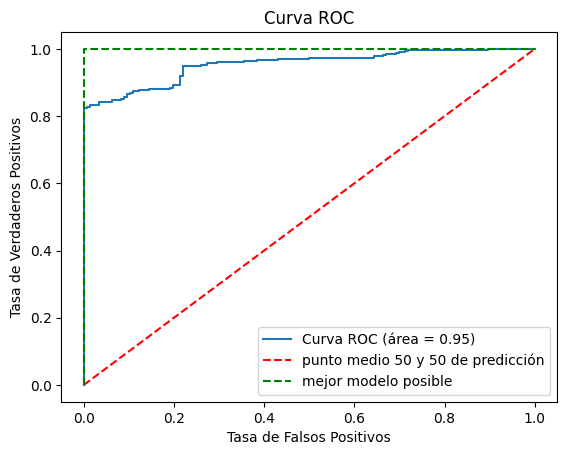

In [33]:
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % curva_roc)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.plot([0, 1], [0, 1], 'k--', label='punto medio 50 y 50 de predicción', color='red')
plt.legend()
plt.plot([0, 0, 1], [0, 1, 1], 'g--', label='mejor modelo posible')
plt.legend()
plt.show()

Analisis de la curva ROC

Qué tan sensible es a cometer un error

--> si tiende a 1.0 con 1.o quiere decir que es muy bueno clasificando